In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D

# **DEEP LEARNING**

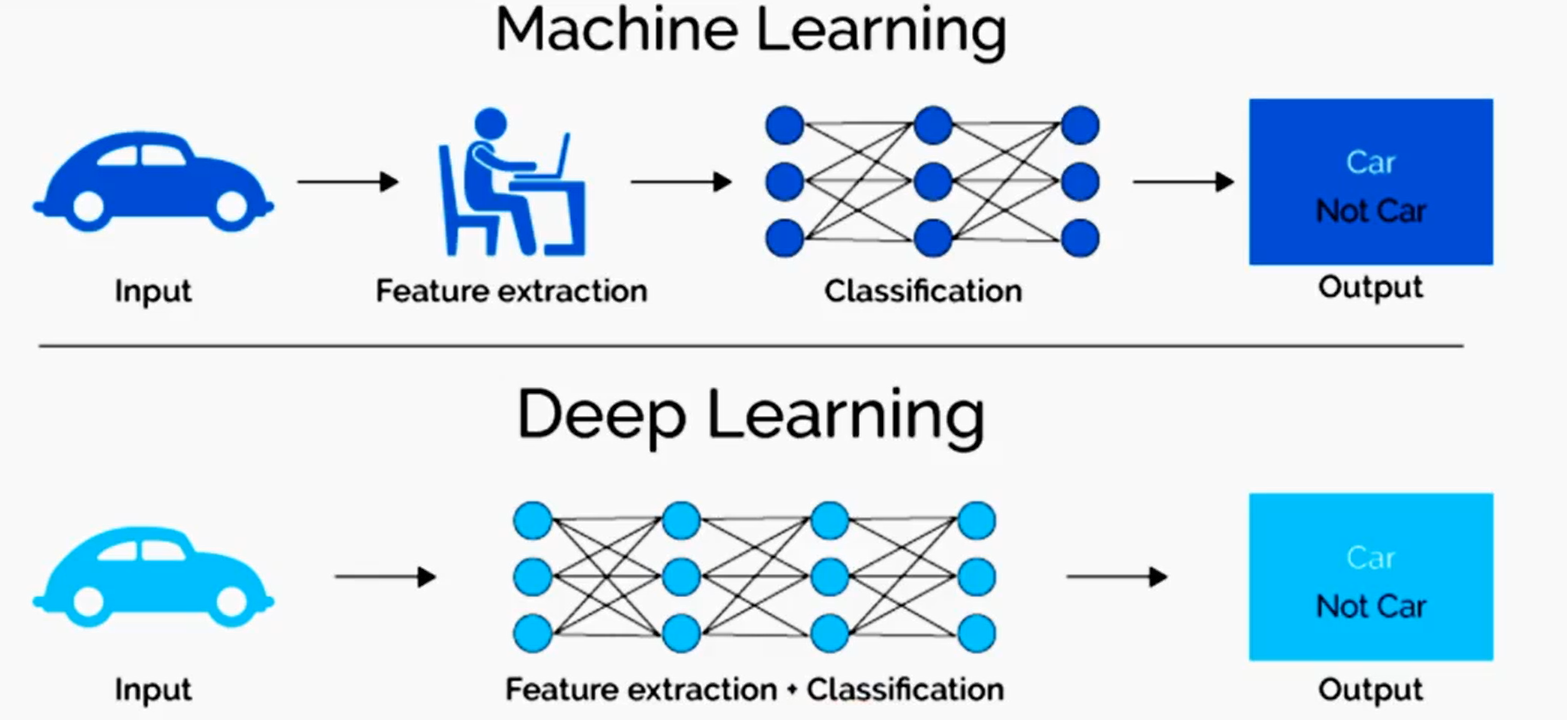

# **MINIST**

Es una base de datos que contiene 70 mil imágenes en escala de grises de dígitos escritos a
mano.

**OBJETIVO: Generar un modelo que permita clasificar las 10 clases.**

# **A. Carga de datos**

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Los arreglos X_train y X_test poseen las imágenes del dataset y cada uno tiene un shape: (N, H,W), donde N es la cantidad de ejemplos, H el alto de la imagen y W el ancho. En el caso de MNIST tanto H como W valen 28.


**Keras** es una API de Redes Neuronales Profundas de alto nivel escrita en Python que utiliza como backend TensorFlow, CNTK, o Theano. Está orientado a poder realizar un rápido prototipado de modelos profundos

# **B. Visualización**

**OBJETIVO: Implemente un código que visualice 8 imágenes de cada clase en una grilla de 8x10. Utiliza la función subplots de matplotlib.pyplot para generar la grilla.**

Ver la primera imagen del conjunto de entrenamiento

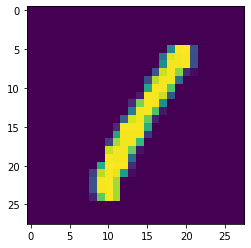

In [3]:
plt.imshow(X_train[3, :,:]) # N, H, W, C

# N = Cantidad de ejemplos
# H = Alto de la imagem
# W = Ancho de la imagen
# C = Canales

Ver la tercera imagen del conjunto de prueba:

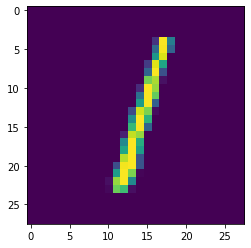

In [4]:
plt.imshow(X_test[2, :,:])

In [5]:
digito_indices_map = {label: np.array([i for i, y in enumerate(Y_train) if y == label]) for label in range(0, 10)}
digito_indices_map

{0: array([    1,    21,    34, ..., 59952, 59972, 59987]),
 1: array([    3,     6,     8, ..., 59979, 59984, 59994]),
 2: array([    5,    16,    25, ..., 59983, 59985, 59991]),
 3: array([    7,    10,    12, ..., 59978, 59980, 59996]),
 4: array([    2,     9,    20, ..., 59943, 59951, 59975]),
 5: array([    0,    11,    35, ..., 59968, 59993, 59997]),
 6: array([   13,    18,    32, ..., 59982, 59986, 59998]),
 7: array([   15,    29,    38, ..., 59963, 59977, 59988]),
 8: array([   17,    31,    41, ..., 59989, 59995, 59999]),
 9: array([    4,    19,    22, ..., 59973, 59990, 59992])}

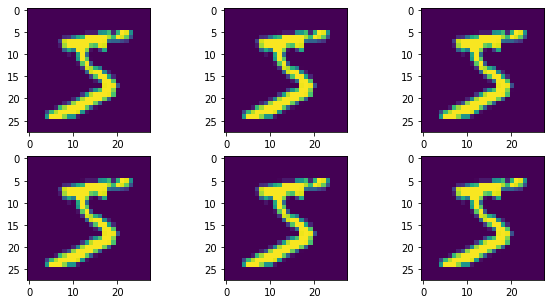

In [6]:
fig, axes = plt.subplots(2, 3) # se hacen 2 filas y 3 columnas de plots
fig.set_figheight(5)
fig.set_figwidth(10)

axes[0][0].imshow(X_train[0])
axes[0][1].imshow(X_train[0])
axes[0][2].imshow(X_train[0])
axes[1][0].imshow(X_train[0])
axes[1][1].imshow(X_train[0])
axes[1][2].imshow(X_train[0])

Grilla de 8 x 10

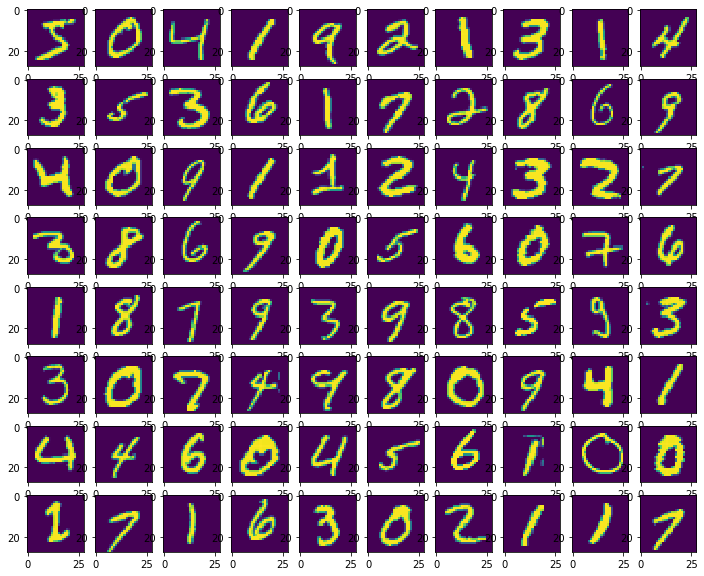

In [7]:
plt.figure(figsize = (12, 10))
X, Y = 10, 8

for i in range(80):  
    plt.subplot(Y, X, i + 1)
    plt.imshow(X_train[i].reshape((28, 28)), interpolation = 'nearest')
plt.show()

# **C. Aplanamiento**

Para clasificar con una red neuronal con capas del tipo x*W+b (clase Dense en Keras), el formato de imagen (N,H,W) no sirve. Por ende los ejemplos deben adaptarse al formato (N,V), donde V es la cantidad de variables, que en este caso sería V=H*W=28*28= 784. La capa Flatten realiza esta operación por nosotros.

In [8]:
from keras.utils.np_utils import to_categorical

y_train_one_hot = to_categorical(Y_train, 10)

Donde Y_train_one_hot es un array que sigue la siguiente lógica:
*   si había un 5 en Y_train ahora en Y_train_one_hot hay un [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
*   si había un 9 en Y_train ahora en Y_train_one_hot hay un [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
*   si había un 0 en Y_train ahora en Y_train_one_hot hay un [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
*   y asi...
Es decir, devuelve un array donde la posición representa al digito y el 1 representa cual es el dígito representado.

In [9]:
# Create model

model = Sequential() # Permite crear modelo de varias capas

# En Keras se agrega una capa “flatten” al comienzo para que aplane la imagen.

model.add(Flatten(input_shape = (28, 28, 1))) # Flatten realiza la siguiente función: V = H * W = 28 * 28 = 784

Nota: La API de Keras es inconsistente, y utiliza el parámetro input_shape en la clase Flatten, mientras que en el resto de capas se utiliza el parámetro input_dim. Recordamos que este parámetro sólo es necesario en la primera capa para especificar el tamaño de la entrada.


# **D. Entrenamiento del modelo**

**OBJETIVO: Entrene un modelo para clasificar las imágenes, utilizando una softmax en la capa de salida y la entropía cruzada como función de error. Mida el error y el accuracy en el conjunto de test (y el de train). Compute la matriz de confusión, pero antes de mirarla ¿qué pares de clases le parece que van a confundirse más?**

In [10]:
num_classes = 10    # Cantidad de clases por ser 10 dígitos

#add model layers
model.add(Dense(num_classes, activation = 'softmax')) 
  # Softmax: Capa “lineal” o “fully-connected”. En este caso 2 neuronas con salida softmax especifican clasificación binaria.
  # input_shape: Tamaño de la entrada = Cantidad de variables del dataset

# compilar el model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  # sgd = “descenso de gradiente estocástico”.
  # loss = es un parámetro que indica como se mide el error y como se optimiza.
  # La función  entropía cruzada es más adecuada para medir errores con targets categóricos.
  # adam =  es un optimizador para el descenso del gradiente
  # categorical_crossentropy es la funcion de entropia cruzada

# Imprimir resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


En cuanto a la siguiente pregunta: **¿qué pares de clases le parece que van a confundirse más?** pensaría que observando la grilla hecha al principio el modelo podría confundir:


*   Los 1 con los 7 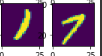


*   Los 2 con los 8 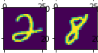



*   Los 3 con los 8 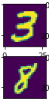



*   Los 4 con los 9 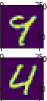




# **E. Normalizacion de las imágenes**

Los pixeles de las imágenes están codificados en el rango 0-255. Es más beneficioso para el entrenamiento de la red que estén normalizadas con media 0 y varianza 1. La normalización debe realizarse a nivel de pixel, es decir, se debe calcular la media de todos los pixeles de todas las imágenes, luego la varianza de todos los pixeles de todas las imágenes y luego realizar la normalización. Esto lo puede realizar con Sk-learn como en las prácticas anteriores.


In [11]:
X_train_flattened = X_train.reshape(-1)
mu = X_train_flattened.mean()
std = X_train_flattened.std()
X_train_norm = (X_train - mu) / std
X_test_norm = (X_test - mu) / std

Entreno el modelo

In [12]:
EPOCAS = 30
model.fit(X_train_norm, y_train_one_hot , epochs = EPOCAS, batch_size = 32)
# EPOCAS: Epochs es la cantidad de veces que se verá todo el conjunto de datos.
# batch_size: Batch_size es la cantidad de datos que se utilizarán en cada iteración.

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3997 - accuracy: 0.8823
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3010 - accuracy: 0.9151
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.9179
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9216
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2784 - accuracy: 0.9226
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2742 - accuracy: 0.9225
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2703 - accuracy: 0.9257
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.9250
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2679 - accuracy: 0.9253
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.265

Evaluar el modelo

In [14]:
y_predict = model.predict(X_test_norm)
y_predict_label = np.array([np.argmax(y) for y in y_predict])

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_predict_label)

313/313 [==============================] - 1s 3ms/step


array([[ 953,    0,    5,    3,    1,    8,    3,    4,    2,    1],
       [   0, 1110,    5,    1,    0,    3,    3,    2,   11,    0],
       [   5,    5,  932,   16,    7,    7,   11,    9,   36,    4],
       [   4,    0,   18,  892,    2,   47,    3,    9,   25,   10],
       [   1,    1,   10,    2,  890,    1,    7,    9,    7,   54],
       [   7,    2,    3,   25,    9,  785,   15,    7,   32,    7],
       [   8,    4,   12,    1,    8,   18,  904,    2,    1,    0],
       [   1,    6,   23,    3,    5,    1,    0,  951,    4,   34],
       [   8,    9,    6,   17,    9,   52,    9,   11,  839,   14],
       [   7,    7,    2,    8,   10,    9,    0,   19,    7,  940]])

# **F. CNN en MNIST**

**OBJETIVO: Diseñe un modelo de Redes Neuronales Convolucionales (CNN) para clasificar el conjunto de datos MNIST.** Pruebe varios modelos distintos, variando los siguientes hiperparámetros (evaluar en el conjunto de testing):
*   Cantidad de capas Conv
*   Cantidad de feature maps (kernels)
*   Stride, padding y kernel_size de las convoluciones
*   Funciones de activación (ej: ReLU)
*   Uso de capas Max Pooling.
*   Elemento de la listaCantidad de neuronas ocultas en la capa Dense.

**Kernel_Size**: Es el tamaño del filtro utilizado.

**Stride**: Es el número de saltos que da el filtro cada vez que se aplica.

**Padding**: Rellena el vector, la señal, por izquierda y por derecha para poder utilizar el kernel de manera total y que el vector resultante tenga un correlato de cada valor para que la señal filtrada tenga el mismo tamaño que la original.

**Alternativa 1**

In [21]:
model = Sequential()

cant_filtros = 64
k = 8
n = 3
m = 3

model.add(Conv2D(cant_filtros, kernel_size = k, strides= (n, m), activation='relu', padding = 'same', input_shape=(28,28, 1)))

model.add(Flatten())
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        4160      
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0         
                                                                 
 dense_7 (Dense)             (None, 10)                64010     
                                                                 
Total params: 68,170
Trainable params: 68,170
Non-trainable params: 0
_________________________________________________________________


Output va a ser un vector de 10 componentes. El None está ahí porque keras siempre maneja tipos de datos matriciales (o tensoriales) y cuando tiene que hablar de vectores rellena esa dimensión con un None.

El Param de Conv2D equivalente a 4160 viene de multiplicar 64 (cantidad de filtros) x 8 (kernel) x 8 + 64. 

El Output Shape de Flatten es de 6400 y sale de multiplicar 64x10x10 del Conv2D.

El total de parámetros es equivalente a Trainable params y viene de la sumatoria de todos los parámetros.

**Alternativa 2**

In [16]:
model = Sequential()

cant_filtros = 120
k = 5
n = 10
m = 10

model.add(Conv2D(cant_filtros, kernel_size = k, strides= (n, m), activation='relu', padding = 'same', input_shape=(28,28, 1)))

model.add(Flatten())
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 3, 3, 120)         3120      
                                                                 
 flatten_2 (Flatten)         (None, 1080)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10810     
                                                                 
Total params: 13,930
Trainable params: 13,930
Non-trainable params: 0
_________________________________________________________________


El Param de Conv2D equivalente a 3120 viene de multiplicar 120x3x3x3-120. Siendo 120 la cantidad de filtros, 3 el tamaño del filtro y 120 el bias.

El Output Shape de Flatten es de 1080 y sale de multiplicar 3x3x120 del Conv2D.

El total de parámetros es equivalente a Trainable params y viene de la sumatoria de todos los parámetros.

Se observa que aumentando la cantidad de filtros, disminuyendo el kernel y aumentando los strides disminuye la cantidad de parámetros.

**Alternativa 3**

In [42]:
model = Sequential()

cant_filtros = 10
k = 3
n = 5
m = 5

model.add(Conv2D(cant_filtros, kernel_size = k, strides= (n, m), activation='relu', padding = 'same', input_shape=(28,28, 1)))

model.add(Flatten())
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 6, 6, 10)          100       
                                                                 
 flatten_28 (Flatten)        (None, 360)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                3610      
                                                                 
Total params: 3,710
Trainable params: 3,710
Non-trainable params: 0
_________________________________________________________________


Disminuyendo todas las variables se observa como el modelo disminuye considerablemente en número de parámetros totales.

**Alternativa 4**

In [46]:
model = Sequential()

cant_filtros = 128
k = 4
n = 2
m = 2

model.add(Conv2D(cant_filtros, kernel_size = k, strides= (n, m), activation='relu', padding = 'same', input_shape=(28,28, 1)))

model.add(Flatten())
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 14, 14, 128)       2176      
                                                                 
 flatten_29 (Flatten)        (None, 25088)             0         
                                                                 
 dense_29 (Dense)            (None, 10)                250890    
                                                                 
Total params: 253,066
Trainable params: 253,066
Non-trainable params: 0
_________________________________________________________________


Exagerando el modelo, se observa que al aumentar la cantidad de filtros y disminuiyendo las demás variables, el número de parámetros totales aumentan considerablemente.